In [6]:
import requests
import zipfile
import os

# URL of the dataset
dataset_url = "http://images.cocodataset.org/zips/train2017.zip"

# Local path to save the downloaded file
dataset_path = "custom-clip-model-flickr8k.zip"
extracted_folder = "Images"

def download_dataset(url, save_path):
    """
    Download the dataset from the given URL and save it to the specified path.
    """
    print(f"Downloading dataset from {url}...")
    with requests.get(url, stream=True) as response:
        response.raise_for_status()
        with open(save_path, "wb") as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)
    print(f"Dataset downloaded and saved to {save_path}.")

def extract_dataset(zip_path, extract_to):
    """
    Extract a zip file to the specified folder.
    """
    print(f"Extracting dataset from {zip_path}...")
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Dataset extracted to {extract_to}.")

# Check if dataset is already downloaded and extracted
if not os.path.exists(extracted_folder):
    # Download and extract the dataset

    extract_dataset(dataset_path, extracted_folder)
    # Optionally remove the zip file after extraction
    os.remove(dataset_path)
    print("Zip file removed.")
else:
    print("Dataset is already downloaded and extracted.")

Extracting dataset from custom-clip-model-flickr8k.zip...
Dataset extracted to Images.
Zip file removed.


# Initializing the directories

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

input_dir = "./Images"
output_dir = "/working"

# Flickr8k dataset path
dataset_path = os.path.join(input_dir, "flickr8k")
image_dir = os.path.join(dataset_path, 'Images')
captions_file = os.path.join(dataset_path, 'captions.txt')

# Saved CLIP Model directory
model_dir = input_dir
fine_tuned_clip_path = os.path.join(model_dir, "fine_tuned_clip")
fine_tuned_clip_processor_path = os.path.join(model_dir, "fine_tuned_clip_processor")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Requirements Installation

In [8]:
!pip install diffusers

# Import libraries

In [9]:
import os
import torch
import logging
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from transformers import CLIPProcessor, CLIPModel, CLIPTextModel, CLIPTokenizer

# For testing CLIP model
from diffusers import StableDiffusionPipeline

# For generating images
import shutil
import math
from tqdm import tqdm
from IPython.display import display
from diffusers import AutoencoderKL, UNet2DConditionModel, LMSDiscreteScheduler

# disable warnings
logging.disable(logging.WARNING)

# Constant variable declaration

In [10]:
height = 224
width = 224
batch_size = 8
shuffle = True
num_epochs = 5

# Check device type (cuda/cpu)

In [11]:
# Initialize CLIP model and processor
device = "cuda" if torch.cuda.is_available() else "cpu"

In [12]:
# Load pre-trained LDM (Stable Diffusion)
pipeline = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
pipeline.to(device)

# Load fine-tuned CLIP
clip_model = CLIPTextModel.from_pretrained(fine_tuned_clip_path)
clip_processor = CLIPTokenizer.from_pretrained(fine_tuned_clip_processor_path)

def generate_image(text_prompt):
    # Encode text using fine-tuned CLIP
    inputs = clip_processor(text=text_prompt, return_tensors="pt", padding=True)
    with torch.no_grad():
        text_embeddings = clip_model(**inputs).last_hidden_state

    # Generate image using LDM
    # generated_image = pipeline(prompt_embeds=text_embeddings, guidance_scale=7.5, height=height, width=width)
    generated_image = pipeline(prompt_embeds=text_embeddings, guidance_scale=7.5)
    image = generated_image.images[0]

    plt.imshow(image)
    plt.title(text_prompt if text_prompt else "<No Text>")
    plt.axis("off")
    plt.show()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

# Creating classes

## Custom Flickr8k Dataset class

In [ ]:
class Flickr8kDataset(Dataset):
    def __init__(self, images_dir, captions_df, transform=None):
        self.images_dir = images_dir
        self.captions_df = captions_df
        self.transform = transform

    def __len__(self):
        return len(self.captions_df)

    def __getitem__(self, idx):
        image_name = self.captions_df.iloc[idx, 0]
        caption = self.captions_df.iloc[idx, 1]

        # Load image
        image_path = os.path.join(self.images_dir, image_name)
        image = Image.open(image_path).convert("RGB")

        # Apply transforms
        if self.transform:
            image = self.transform(image)

        return {"image": image, "caption": caption}

# Define transforms for images
transform = transforms.Compose([
    transforms.Resize((height, width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
])

# Load captions
captions_df = pd.read_csv(captions_file)

# Create dataset and DataLoader
dataset = Flickr8kDataset(images_dir=image_dir, captions_df=captions_df, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

## Finetuning CLIP model on Flickr8k

In [ ]:
class Fine_tune_clip:
    """
    A class designed for fine-tuning a CLIP model using a custom dataset

    dataloader (torch.utils.data.DataLoader): Handles the loading of training data.
    clip_model (transformers.CLIPModel): The CLIP model to be fine-tuned.
    clip_processor (transformers.CLIPProcessor): Prepares images and text for training.
    output_dir (str): Directory to save the fine-tuned model and its processor.
    height (int): Specifies the height of input images (default: 224).
    width (int): Specifies the width of input images (default: 224).
    batch_size (int): Defines the batch size for training (default: 8).
    shuffle (bool): Indicates whether to shuffle the dataset during training (default: True).
    num_epochs (int): Number of training epochs (default: 5).
    device (str): Specifies the training device, such as "cuda" or "cpu" (default: "cuda").
    optimizer (torch.optim.Optimizer): Optimizer used during training (default: None).

    """

    def __init__(self, dataloader, clip_model, clip_processor, output_dir, height=224, width=224, batch_size=8, shuffle=True, num_epochs=5, device="cuda"):
        """
    Initializes the Fine_tune_clip class with the provided dataloader, model, processor, and training configuration.

    Parameters:
    dataloader (torch.utils.data.DataLoader): Used to load training data.
    clip_model (transformers.CLIPModel): The CLIP model to be fine-tuned.
    clip_processor (transformers.CLIPProcessor): Handles preprocessing of images and text.
    output_dir (str): Directory for saving the fine-tuned model and processor.
    height (int): Input image height (default: 224).
    width (int): Input image width (default: 224).
    batch_size (int): Batch size for training (default: 8).
    shuffle (bool): Specifies whether to shuffle the training dataset (default: True).
    num_epochs (int): Total number of training epochs (default: 5).
    device (str): Device for training, such as "cuda" or "cpu" (default: "cuda").

        """

        self.dataloader = dataloader
        self.len_dataloader = len(dataloader)
        self.height = height
        self.width = width
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.num_epochs = num_epochs
        self.clip_model = clip_model
        self.clip_processor = clip_processor
        self.optimizer = None
        self.device = device
        self.output_dir = output_dir

    def set_optimizer(self, lr=1e-5):

        self.optimizer = torch.optim.AdamW(self.clip_model.parameters(), lr=lr)

    def train_clip_model(self, num_epochs=5):
        """
        Trains the CLIP model using the specified number of epochs.

        """

        self.clip_model.train()
        for epoch in range(num_epochs):
            progress_bar = tqdm(self.dataloader, total=self.len_dataloader, desc=f"Epoch {epoch + 1}/{num_epochs}")
            for idx, batch in enumerate(progress_bar):
                images = batch["image"].to(self.device)
                captions = batch["caption"]

                text_inputs = self.clip_processor(text=captions, return_tensors="pt", padding=True).to(self.device)

                outputs = self.clip_model(
                    pixel_values=images,
                    input_ids=text_inputs.input_ids,
                    attention_mask=text_inputs.attention_mask,
                    return_loss=True
                )
                loss = outputs.loss

                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

                progress_bar.set_postfix(loss=loss.item())

            # Save the fine-tuned model
            self.clip_model.save_pretrained(os.path.join(self.output_dir, "fine_tuned_clip"))
            self.clip_processor.save_pretrained(os.path.join(self.output_dir, "fine_tuned_clip_processor"))

## Diffusion model (VAE, UNet, Custom CLIP model)

In [13]:
class Diffusion_model:
    """
    A class designed for image generation using a diffusion model with a Variational Autoencoder (VAE) and U-Net architecture.

    Attributes:
    vae (AutoencoderKL): Encodes and decodes images as part of the generation process.
    unet (UNet2DConditionModel): Predicts noise in the diffusion process.
    text_encoder (CLIPTextModel): Embeds textual prompts into a form suitable for the model.
    tokenizer (CLIPTokenizer): Prepares textual prompts for the text encoder.
    scheduler (LMSDiscreteScheduler): Manages diffusion steps during the image generation process.
    height (int): Specifies the height of the generated images (default: 224).
    width (int): Specifies the width of the generated images (default: 224).
    device (str): Determines the computational device, such as "cuda" or "cpu" (default: "cuda").

    """

    def __init__(self, vae, unet, text_encoder, tokenizer, scheduler, height=224, width=224, device="cuda"):
        """

        Initializes the Diffusion_model class with the specified components, including models,
        tokenizer, scheduler, and other parameters.

        """

        self.vae = vae
        self.unet = unet
        self.text_encoder = text_encoder
        self.tokenizer = tokenizer
        self.scheduler = scheduler
        self.height = height
        self.width = width,
        self.device = device

    def load_image(self, img_path):
        """
        Loads and resizes an image from the specified file path.

        Returns:
            PIL.Image.Image: The resized image in RGB format.
        """

        return Image.open(img_path).convert('RGB').resize((self.height, self.width))

    def pil_to_latents(self, image):
        """
        Converts a PIL image to latent space representation.

        Returns:
            torch.Tensor: The latent representation of the image.
        """

        init_image = transforms.ToTensor()(image).unsqueeze(0) * 2.0 - 1.0
        init_image = init_image.to(device=self.device, dtype=torch.float16)
        init_latent_dist = self.vae.encode(init_image).latent_dist.sample() * 0.18215
        return init_latent_dist

    def latents_to_pil(self, latents):
        """
        Converts latents back to a PIL image.

        Returns:
            List[PIL.Image.Image]: The decoded images.
        """

        latents = (1 / 0.18215) * latents
        with torch.no_grad():
            image = self.vae.decode(latents).sample
        image = (image / 2 + 0.5).clamp(0, 1)
        image = image.detach().cpu().permute(0, 2, 3, 1).numpy()
        images = (image * 255).round().astype("uint8")
        pil_images = [Image.fromarray(image) for image in images]
        return pil_images

    def encode_text(self, prompts, maxlen=None):
        """
        Encodes textual prompts into embeddings.

        Returns:
            torch.Tensor: The embeddings of the prompts.
        """

        if maxlen is None:
            maxlen = tokenizer.model_max_length
        inp = self.tokenizer(prompts, padding="max_length", max_length=maxlen, truncation=True, return_tensors="pt")
        return self.text_encoder(inp.input_ids.to(device))[0].half()

    def generate_image(self, prompts, g=7.5, seed=100, steps=70, dim=512, save_int=True):
        """
        Generates an image based on textual prompts using diffusion.

        Args:
            prompts (List[str]): The list of textual prompts.
            g (float): The guidance scale for conditional generation (default is 7.5).
            seed (int): The random seed for reproducibility (default is 100).
            steps (int): The number of diffusion steps (default is 70).
            dim (int): The spatial dimensions of the latent space (default is 512).
            save_int (bool): Whether to save intermediate results (default is True).

        Returns:
            List[PIL.Image.Image]: The generated images.
        """

        prompts_batch_size = len(prompts)

        encoded_text = self.encode_text(prompts)

        uncond_embed =  self.encode_text([""] * prompts_batch_size, encoded_text.shape[1])
        embed = torch.cat([uncond_embed, encoded_text])

        if seed:
            torch.manual_seed(seed)

        latents = torch.randn((prompts_batch_size, self.unet.config.in_channels, dim//8, dim//8))

        self.scheduler.set_timesteps(steps)

        latents = latents.to(self.device).half() * self.scheduler.init_noise_sigma
        latents_norm = torch.norm(latents.view(latents.shape[0], -1), dim=1).mean().item()

        for i,ts in enumerate(tqdm(scheduler.timesteps)):
            inp = scheduler.scale_model_input(torch.cat([latents] * 2), ts)

            with torch.no_grad():
                u,t = self.unet(inp, ts, encoder_hidden_states=embed).sample.chunk(2)

            pred = u + g*(t-u)

            latents = self.scheduler.step(pred, ts, latents).prev_sample

            latents_norm = torch.norm(latents.view(latents.shape[0], -1), dim=1).mean().item()

        return self.latents_to_pil(latents)

    def plot_images(self, images, prompts):
        """
        Plots a grid of images with corresponding textual prompts.

        """

        total_images = len(images)

        n = math.ceil(math.sqrt(total_images))

        rows = (total_images + n - 1) // n

        fig, axs = plt.subplots(rows, n, figsize=(n * 3, rows * 3))
        axs = np.array(axs).reshape(-1)

        for i in range(rows * n):
            if i < total_images:
                axs[i].imshow(images[i])
                axs[i].title.set_text(prompts[i] if prompts[i] else "<No Text>")
                axs[i].axis("off")
            else:
                axs[i].axis("off")

        plt.tight_layout()
        plt.show()

# Train and generate images

## Fine tune CLIP model on flickr8k dataset using pre-trained openai models

In [14]:
model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
fine_tune_clip_class.train_clip_model(num_epochs=5)

Epoch 1/5:   1%|▏         | 64/5057 [00:58<1:13:43,  1.13it/s, loss=0.00886] 

## Create images from prompt(s) using cusotm diffusion model

In [16]:
# Load fine-tuned CLIP
text_encoder = CLIPTextModel.from_pretrained(fine_tuned_clip_path).to(device)
tokenizer = CLIPTokenizer.from_pretrained(fine_tuned_clip_processor_path)

## Initiating the VAE
vae = AutoencoderKL.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="vae", torch_dtype=torch.float16).to(device)
# vae.config.resolution = 224
# vae.config.scaling_factor = 1 / 8

## Initializing a scheduler and Setting number of sampling steps
scheduler = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000)
scheduler.set_timesteps(50)

## Initializing the U-Net model
unet = UNet2DConditionModel.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="unet", torch_dtype=torch.float16).to(device)
# unet.config.sample_size = 28

In [29]:
diffusion_model = Diffusion_model(
    vae=vae,
    unet=unet,
    text_encoder=text_encoder,
    tokenizer=tokenizer,
    scheduler=scheduler,
    height=height,
    width=width,
    device=device
)

In [38]:
prompts = [
    "A golden retriever playing in field.",
    "A Teacher teaching a class",

]
height = 512
width = 512

In [39]:
images = diffusion_model.generate_image(prompts=prompts, g=7.5, seed=100, steps=70, dim=height, save_int=True)

100%|██████████| 70/70 [00:18<00:00,  3.74it/s]


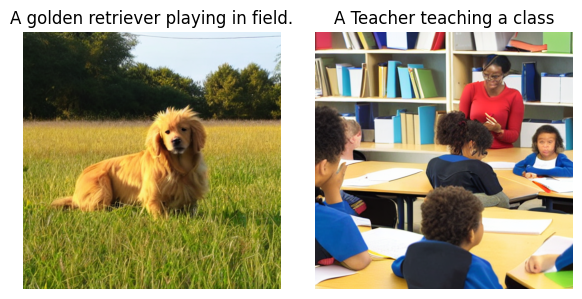

In [40]:
diffusion_model.plot_images(images=images, prompts=prompts)

100%|██████████| 70/70 [00:18<00:00,  3.84it/s]


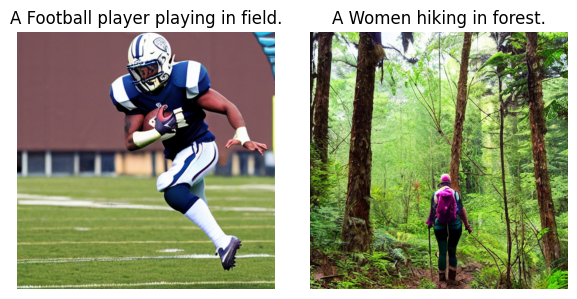

In [41]:
prompts = [
    "A Football player playing in field.",
    "A Women hiking in forest."
]
images = diffusion_model.generate_image(
    prompts=prompts,
    g=7.5,
    seed=100,
    steps=70,
    dim=height,
    save_int=True
)
diffusion_model.plot_images(
    images=images,
    prompts=prompts
)

100%|██████████| 70/70 [00:18<00:00,  3.81it/s]


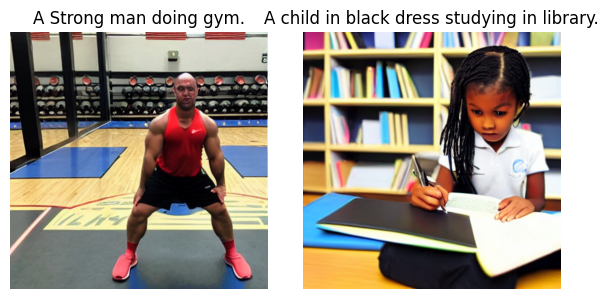

In [44]:
prompts = [
    "A Strong man doing gym.",
    "A child in black dress studying in library."
]
images = diffusion_model.generate_image(
    prompts=prompts,
    g=7.5,
    seed=100,
    steps=70,
    dim=height,
    save_int=True
)
diffusion_model.plot_images(
    images=images,
    prompts=prompts
)